In [70]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [71]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import cv2
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input

In [72]:
base_dir = "/content/gdrive/MyDrive/ADdataSet"

In [73]:
train = ImageDataGenerator(rescale=1./255)
test =  ImageDataGenerator(rescale=1./255)
val =  ImageDataGenerator(rescale=1./255)

In [74]:
train=base_dir="/content/gdrive/MyDrive/ADdataSet/train"

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='training',
    seed=1000 )

Found 15874 files belonging to 4 classes.
Using 12700 files for training.


In [75]:
val=base_dir="/content/gdrive/MyDrive/ADdataSet/train"

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val,
    validation_split=0.2,
    image_size=(224,224),
    batch_size=32,
    subset='validation',
    seed=1000
    )

Found 15874 files belonging to 4 classes.
Using 3174 files for validation.


In [76]:
test=base_dir ="/content/gdrive/MyDrive/ADdataSet/val"

test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224,224),
    batch_size=32,
    seed=1000
    )

Found 6400 files belonging to 4 classes.


In [77]:
class_names = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']

In [78]:
train_data.class_names = class_names
val_data.class_names = class_names

In [79]:
print(val_data)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


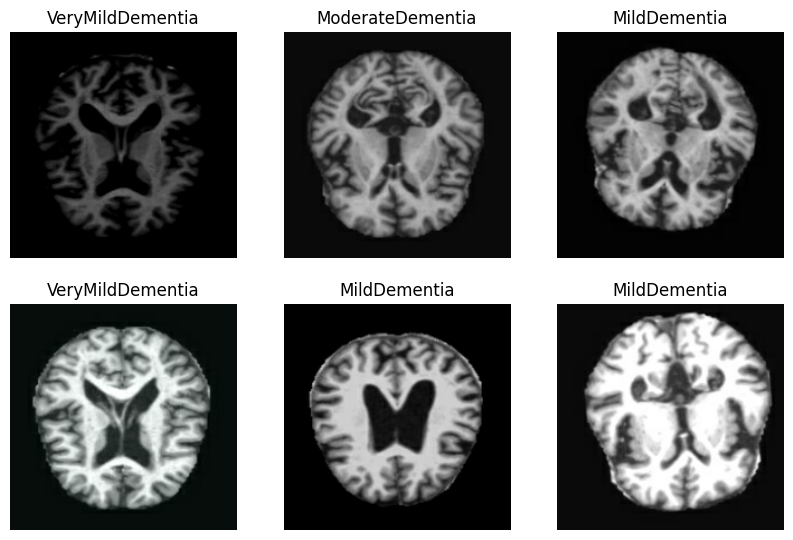

In [80]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")
plt.savefig("sample.png")

In [81]:
model=Sequential()

model.add(Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 64)      

In [82]:
model.compile(optimizer = tf.keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [83]:
history = model.fit(train_data, validation_data=val_data, epochs=45)

Epoch 1/45
397/397 [==============================] - 40s 92ms/step - loss: 2.0441 - accuracy: 0.2505 - val_loss: 1.3750 - val_accuracy: 0.2533
Epoch 2/45
397/397 [==============================] - 42s 105ms/step - loss: 1.3934 - accuracy: 0.2728 - val_loss: 1.3606 - val_accuracy: 0.3283
Epoch 3/45
397/397 [==============================] - 36s 90ms/step - loss: 1.3664 - accuracy: 0.3053 - val_loss: 1.3257 - val_accuracy: 0.3239
Epoch 4/45
397/397 [==============================] - 43s 108ms/step - loss: 1.3197 - accuracy: 0.3483 - val_loss: 1.2267 - val_accuracy: 0.4650
Epoch 5/45
397/397 [==============================] - 36s 90ms/step - loss: 1.2302 - accuracy: 0.4039 - val_loss: 1.0845 - val_accuracy: 0.5435
Epoch 6/45
397/397 [==============================] - 36s 89ms/step - loss: 1.1076 - accuracy: 0.4752 - val_loss: 0.9488 - val_accuracy: 0.6093
Epoch 7/45
397/397 [==============================] - 36s 88ms/step - loss: 0.9805 - accuracy: 0.5317 - val_loss: 0.8223 - val_accurac

In [84]:
loss,acc=model.evaluate(test_data)
print('Test')
print(f'loss: {loss}')
print(f'acc: {acc*100}')

200/200 [==============================] - 12s 59ms/step - loss: 0.1457 - accuracy: 0.9580
Test
loss: 0.14569620788097382
acc: 95.79687714576721


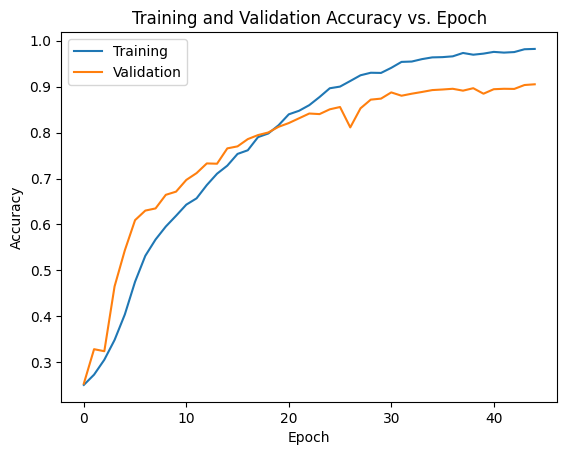

In [85]:
# Plot training and validation accuracy vs. epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'],loc='upper left')
plt.show()

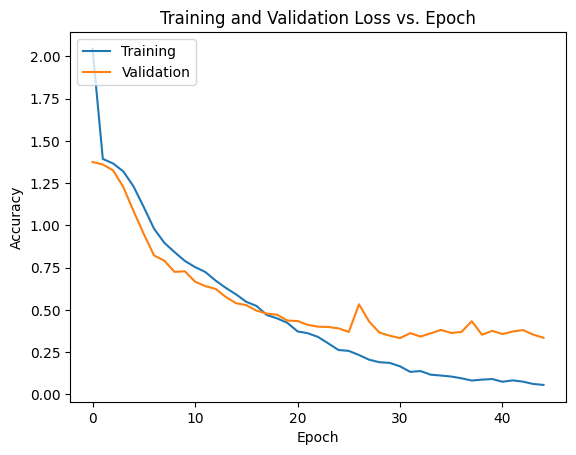

In [86]:
# Plot training and validation loss vs. epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'],loc='upper left')
plt.show()

In [87]:
model.save('finalmodel.h5')